In [1]:
import svjflatanalysis
import numpy as np
from time import strftime
import os
import os.path as osp
import imp, importlib
import mplhep
import seutils

import matplotlib.pyplot as plt
import numpy as np
import coffea

   INFO:2020-11-03 10:12:52:__init__:31 Using tqdm notebook


In [188]:
def make_plain_str(s):
    import re
    p = re.sub(r'[\W]+', '', s.replace('-', '_'))
    return p

In [161]:
importlib.reload(svjflatanalysis.samples)
bkgs = svjflatanalysis.samples.init_bkgs_triggered(max_entries=400)

   INFO:2020-11-03 18:20:58:samples:253 Loading /Users/klijnsma/work/svj/flat/data/triggered_and_jetpt550/Autumn18.WJetsToLNu_HT-400To600_TuneCP5_13TeV-madgraphMLM-pythia8.root
/Users/klijnsma/miniconda3/envs/condaroot/lib/python3.8/site-packages/uproot/source/cursor.py:73: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return source.data(start, stop).tostring()
   INFO:2020-11-03 18:20:58:dataset:144 Cached ~3.4 Mb (400 entries, 27 branches) for <svjflatanalysis.dataset.BackgroundDataset wjets (1 root files) object at 0x1a4413310>
   INFO:2020-11-03 18:20:58:samples:253 Loading /Users/klijnsma/work/svj/flat/data/triggered_and_jetpt550/Autumn18.TTJets_HT-600to800_TuneCP5_13TeV-madgraphMLM-pythia8.root
   INFO:2020-11-03 18:21:13:dataset:144 Cached ~493.3 Mb (400 entries, 27 branches) for <svjflatanalysis.dataset.BackgroundDataset ttjets (1 root files) object at 0x1a4413b80>
   INFO:2020-11-03 18:21:13:samples:253 Loading /Users/klijnsma/work/svj/flat/data/trigge

   INFO:2020-11-03 18:25:47:dataset:144 Cached ~5.7 Mb (400 entries, 27 branches) for <svjflatanalysis.dataset.BackgroundDataset zjets (1 root files) object at 0x4c62e3550>
   INFO:2020-11-03 18:25:47:samples:253 Loading /Users/klijnsma/work/svj/flat/data/triggered_and_jetpt550/Autumn18.TTJets_DiLept_TuneCP5_13TeV-madgraphMLM-pythia8.root
   INFO:2020-11-03 18:25:47:dataset:144 Cached ~7.1 Mb (400 entries, 27 branches) for <svjflatanalysis.dataset.BackgroundDataset ttjets (1 root files) object at 0x4c62e38b0>
   INFO:2020-11-03 18:25:47:samples:253 Loading /Users/klijnsma/work/svj/flat/data/triggered_and_jetpt550/Autumn18.TTJets_HT-800to1200_TuneCP5_13TeV-madgraphMLM-pythia8.root
   INFO:2020-11-03 18:26:12:dataset:144 Cached ~854.7 Mb (400 entries, 27 branches) for <svjflatanalysis.dataset.BackgroundDataset ttjets (1 root files) object at 0x1a1bc7d30>
   INFO:2020-11-03 18:26:13:samples:253 Loading /Users/klijnsma/work/svj/flat/data/triggered_and_jetpt550/Autumn18.QCD_Pt_120to170_Tune

In [162]:
importlib.reload(svjflatanalysis.samples)
signals = svjflatanalysis.samples.init_sigs_triggered(2018, max_entries=None)

   INFO:2020-11-03 18:30:45:dataset:144 Cached ~6.5 Mb (4535 entries, 27 branches) for <svjflatanalysis.dataset.SignalDataset mz150_year2018 (1 root files) object at 0x92d433670>
   INFO:2020-11-03 18:30:46:dataset:144 Cached ~16.0 Mb (11181 entries, 27 branches) for <svjflatanalysis.dataset.SignalDataset mz250_year2018 (1 root files) object at 0x1a32f3e80>


In [163]:
list(sorted(signals[0].cache[0].keys()))

[b'HT',
 b'JetsAK15',
 b'JetsAK15.fCoordinates.fE',
 b'JetsAK15.fCoordinates.fEta',
 b'JetsAK15.fCoordinates.fPhi',
 b'JetsAK15.fCoordinates.fPt',
 b'JetsAK15_MT',
 b'JetsAK15_NsubjettinessTau1',
 b'JetsAK15_NsubjettinessTau2',
 b'JetsAK15_NsubjettinessTau3',
 b'JetsAK15_RT',
 b'JetsAK15_axismajor',
 b'JetsAK15_axisminor',
 b'JetsAK15_closest',
 b'JetsAK15_closest.fCoordinates.fE',
 b'JetsAK15_closest.fCoordinates.fEta',
 b'JetsAK15_closest.fCoordinates.fPhi',
 b'JetsAK15_closest.fCoordinates.fPt',
 b'JetsAK15_closest_MT',
 b'JetsAK15_closest_NsubjettinessTau1',
 b'JetsAK15_closest_NsubjettinessTau2',
 b'JetsAK15_closest_NsubjettinessTau3',
 b'JetsAK15_closest_RT',
 b'JetsAK15_closest_axismajor',
 b'JetsAK15_closest_axisminor',
 b'JetsAK15_closest_ecfN2b1',
 b'JetsAK15_closest_ecfN2b2',
 b'JetsAK15_closest_ecfN3b1',
 b'JetsAK15_closest_ecfN3b2',
 b'JetsAK15_closest_girth',
 b'JetsAK15_closest_ptD',
 b'JetsAK15_closest_softDropMass',
 b'JetsAK15_closest_subjets.fCoordinates.fE',
 b'Jets

# Distributions

In [210]:
def plot_var(datasets, get_array, varname, ax=None, right=800.):
    if ax is None:
        fig = plt.figure(figsize=(8,8))
        ax = fig.gca()
    hist = svjflatanalysis.roccurve.Hist(
        varname=varname,
        right=right,
        nbins=24
        )
    for dataset in datasets:
        hist.fill(
            svjflatanalysis.iterate(dataset),
            get_array,
            cat=dataset.name if dataset.is_signal() else dataset.get_category(),
            )
    hist.plot(ax=ax, density=False)
    ax = mplhep.cms.cmslabel(data=False, paper=False, year='2018', ax=ax, fontsize=22)
    ax.set_yscale('log')
    ax.set_ylim(0.0001)
    return ax

def plot_var_also_window(*args, **kwargs):
    fig = plt.figure(figsize=(16,8))
    ax = fig.add_subplot(1, 2, 1)
    kwargs['ax'] = ax
    r1 = plot_var(*args, **kwargs)
    ax = fig.add_subplot(1, 2, 2)
    kwargs['ax'] = ax
    args = list(args)
    args[1] = svjflatanalysis.roccurve.apply_window_onfn(args[1], 100., 300.)
    r2 = plot_var(*args, **kwargs)
    varname = kwargs['varname'] if 'varname' in kwargs else args[2]
    plt.savefig('plots/'+varname+'.pdf', bbox_inches='tight')
    return r1, r2

/Users/klijnsma/miniconda3/envs/condaroot/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/klijnsma/miniconda3/envs/condaroot/lib/python3.8/site-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)
/Users/klijnsma/miniconda3/envs/condaroot/lib/python3.8/site-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)
'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
/Users/klijnsma/miniconda3/envs/condaroot/lib/python3.8/site-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "

/Users/klijnsma/miniconda3/envs/condaroot/lib/python3.8/site-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)
'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
/Users/klijnsma/miniconda3/envs/condaroot/lib/python3.8/site-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)
/Users/klijnsma/miniconda3/envs/condaroot/lib/python3.8/site-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "

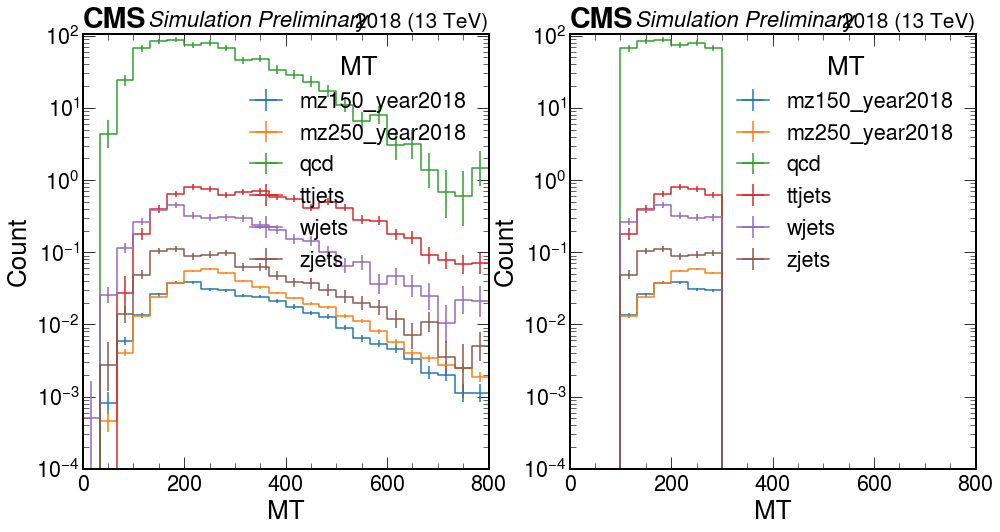

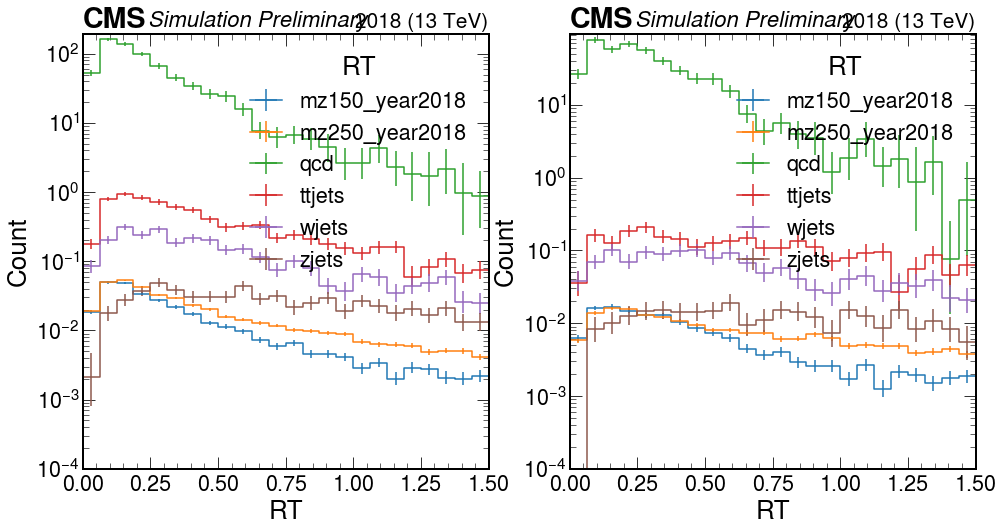

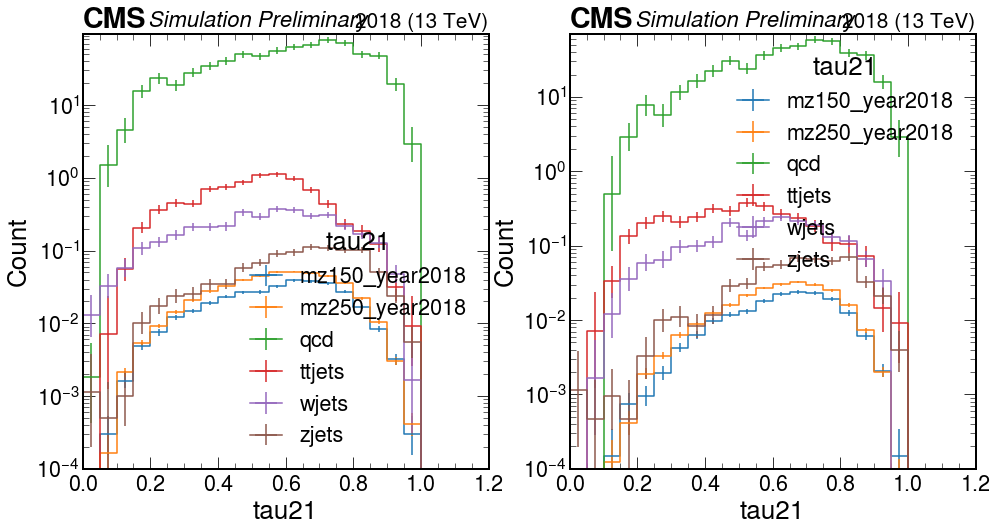

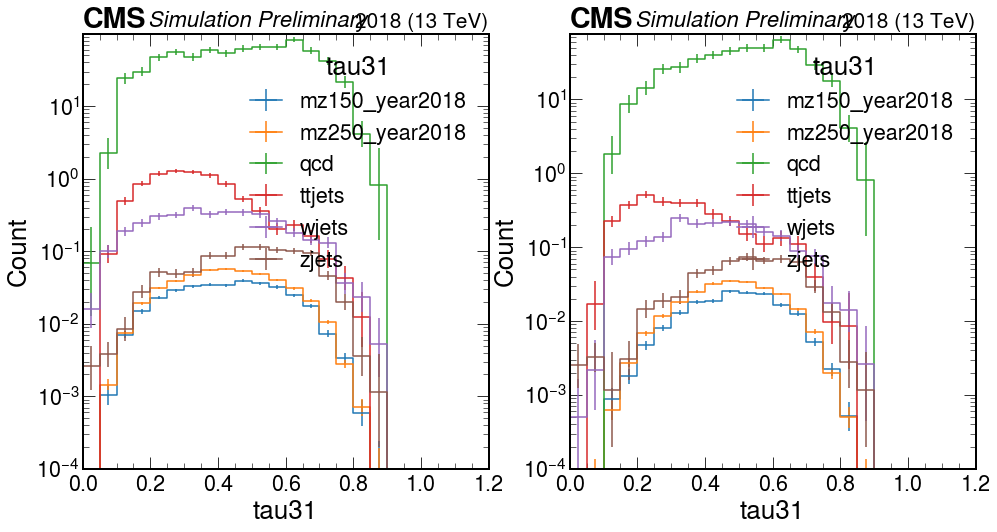

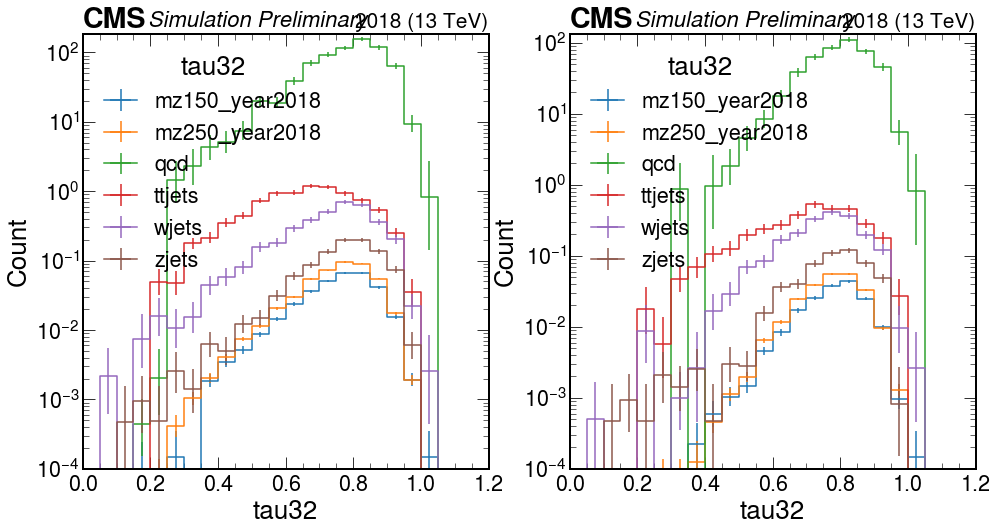

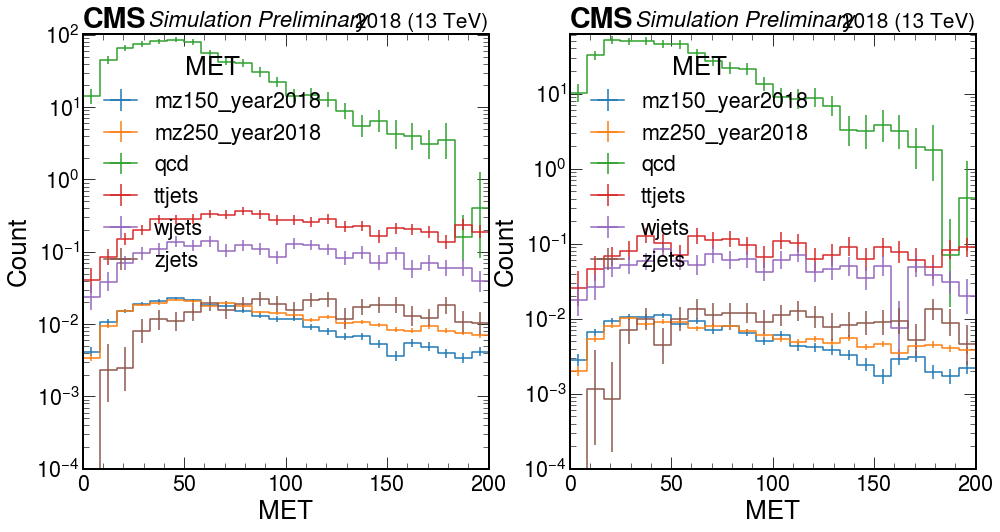

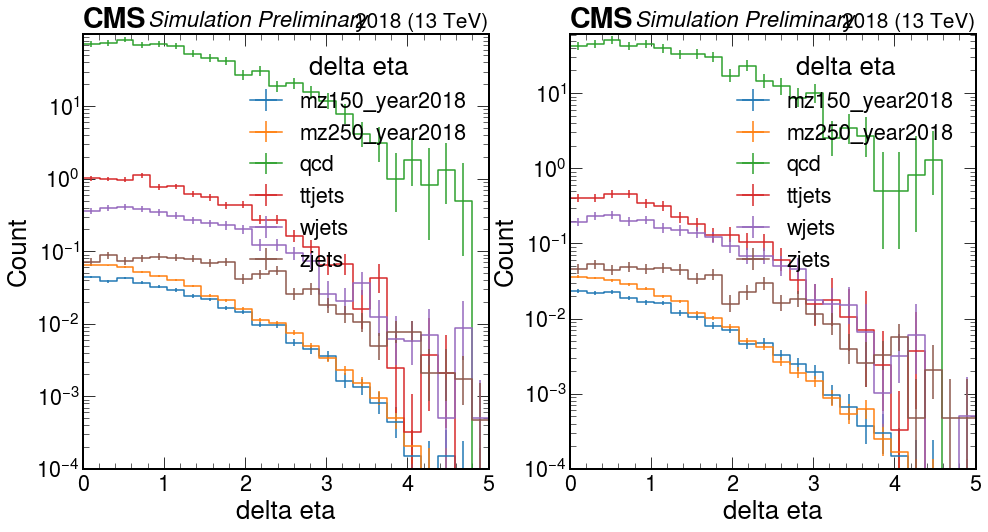

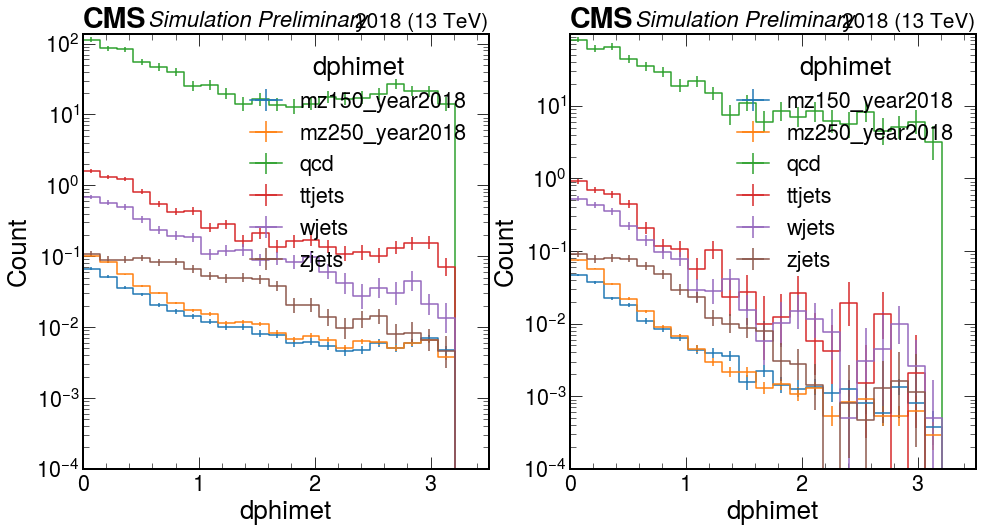

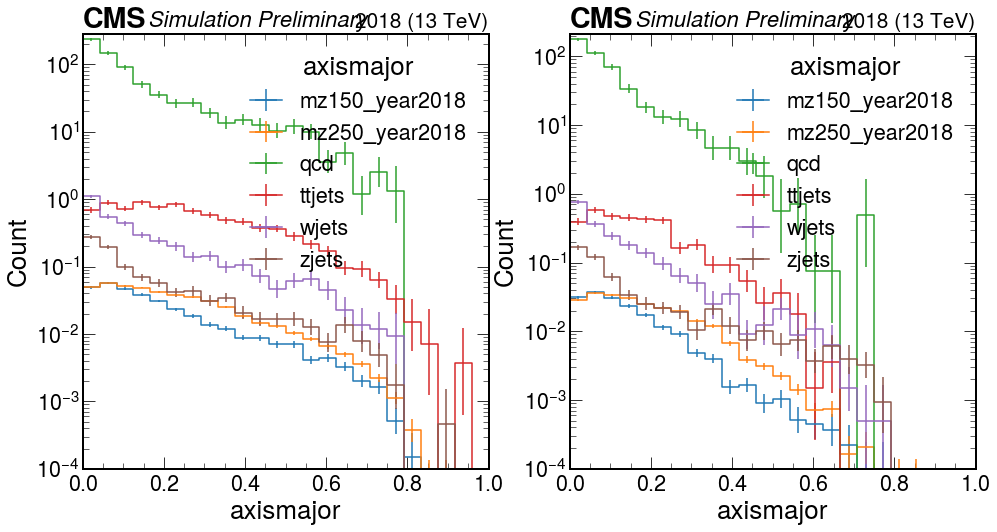

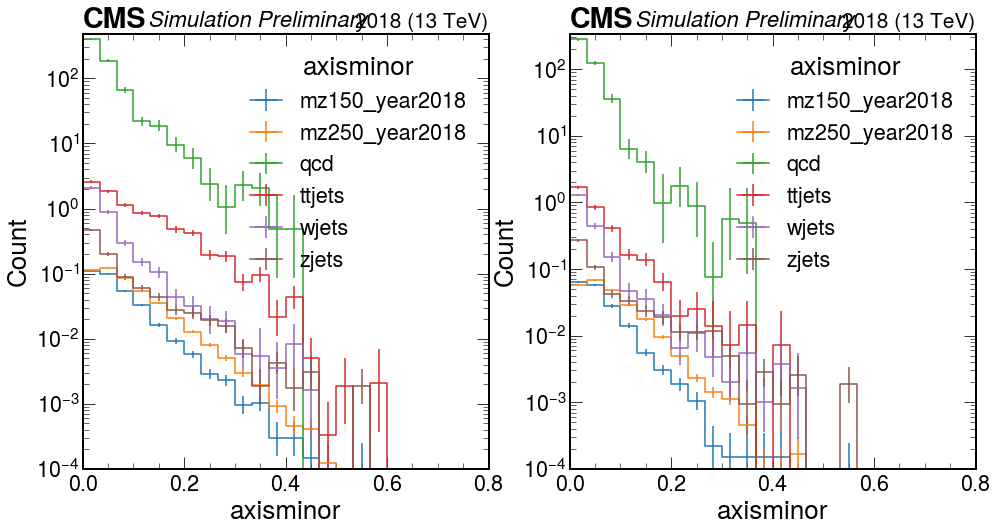

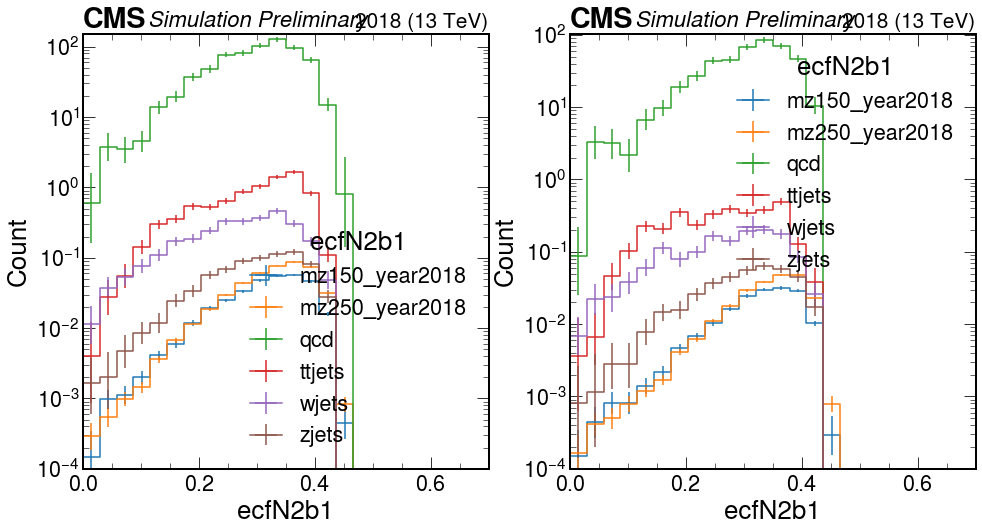

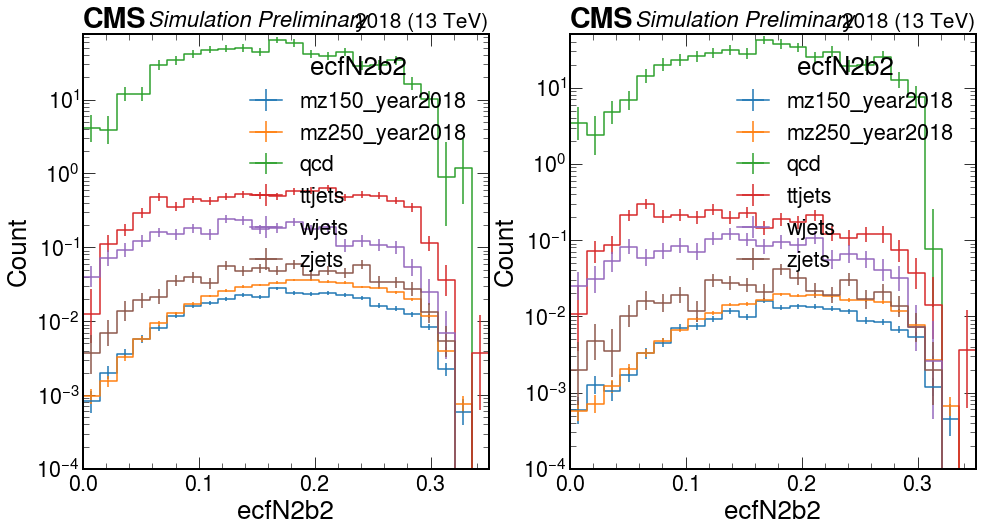

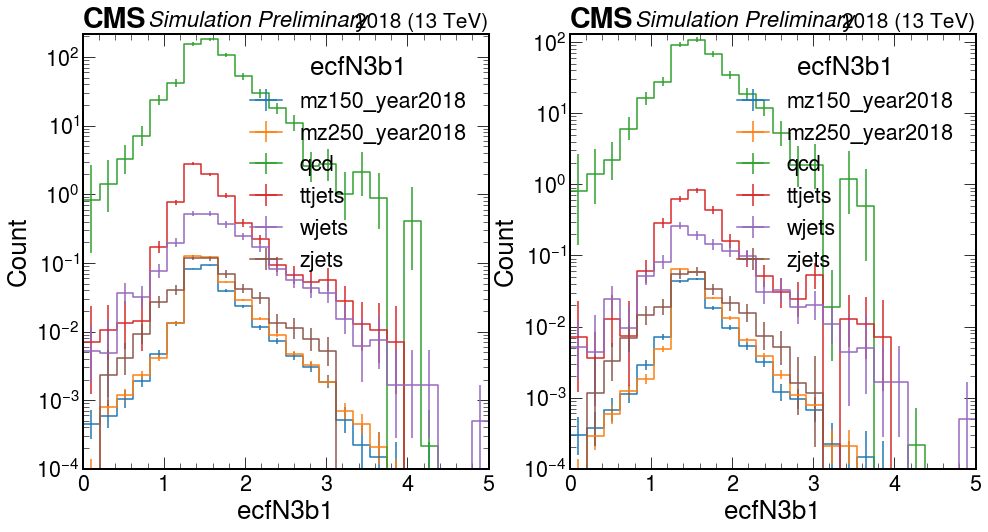

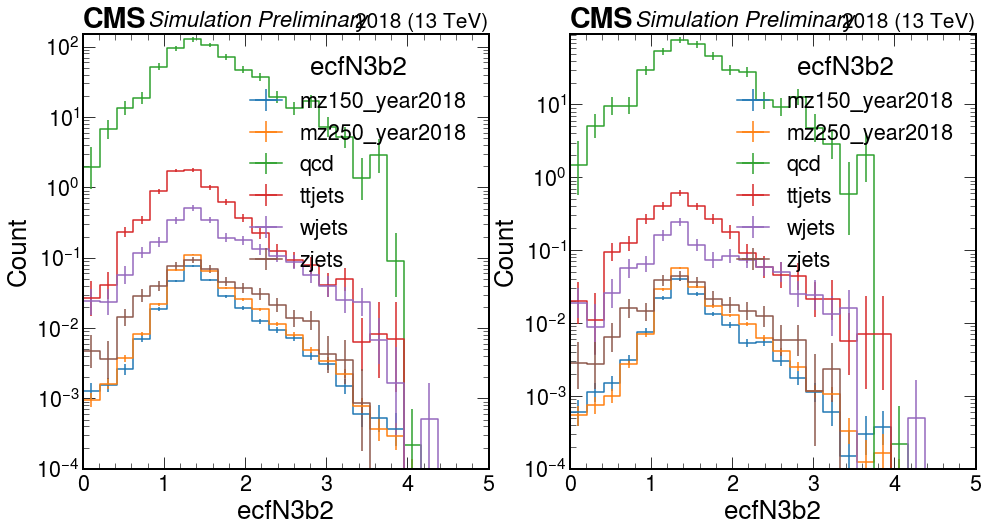

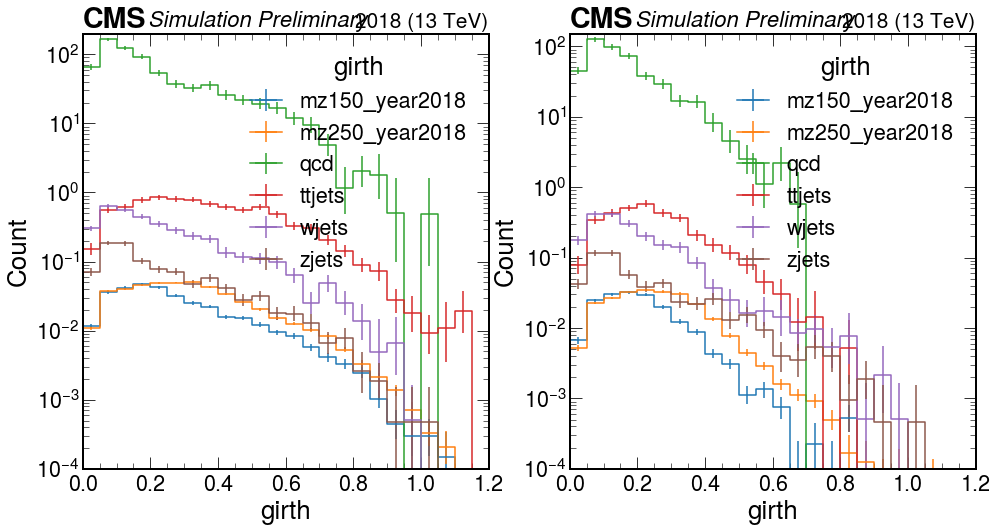

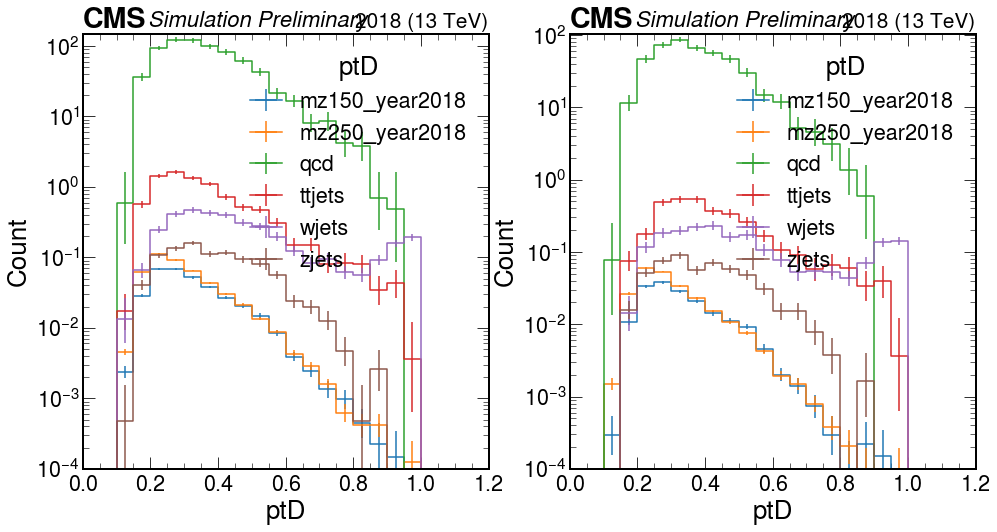

In [211]:
plot_var_also_window(
    signals + bkgs,
    lambda arrays: np.array(arrays[b'JetsAK15_subleading_MT'].flatten()),
    varname = 'MT', right=800.,
    )

plot_var_also_window(
    signals + bkgs,
    lambda arrays: np.array(arrays[b'JetsAK15_subleading_RT'].flatten()),
    varname = 'RT', right=1.5,
    )

plot_var_also_window(
    signals + bkgs,
    lambda arrays: np.array(arrays[b'JetsAK15_subleading_NsubjettinessTau2'].flatten()) / np.array(arrays[b'JetsAK15_subleading_NsubjettinessTau1'].flatten()),
    varname = 'tau21', right=1.2,
    )
plot_var_also_window(
    signals + bkgs,
    lambda arrays: np.array(arrays[b'JetsAK15_subleading_NsubjettinessTau3'].flatten()) / np.array(arrays[b'JetsAK15_subleading_NsubjettinessTau1'].flatten()),
    varname = 'tau31', right=1.2,
    )
plot_var_also_window(
    signals + bkgs,
    lambda arrays: np.array(arrays[b'JetsAK15_subleading_NsubjettinessTau3'].flatten()) / np.array(arrays[b'JetsAK15_subleading_NsubjettinessTau2'].flatten()),
    varname = 'tau32', right=1.2,
    )

plot_var_also_window(
    signals + bkgs,
    lambda arrays: np.array(arrays[b'MET'].flatten()),
    varname = 'MET', right=200.,
    )

plot_var_also_window(
    signals + bkgs,
    lambda arrays: svjflatanalysis.arrayutils.calculate_deltaeta(arrays).flatten(),
    varname = 'delta eta', right=5.,
    )

plot_var_also_window(
    signals + bkgs,
    lambda arrays: svjflatanalysis.arrayutils.calculate_dphimet(arrays).flatten(),
    varname = 'dphimet', right=3.5,
    )

for var, right in [
    ('axismajor', 1.),
    ('axisminor', .8),
    ('ecfN2b1', .7),
    ('ecfN2b2', .35),
    ('ecfN3b1', 5.),
    ('ecfN3b2', 5.),
    ('girth', 1.2),
    ('ptD', 1.2),
    ]:
    plot_var_also_window(
        signals + bkgs,
        lambda arrays: np.array(arrays[b'JetsAK15_subleading_' + var.encode('utf-8')].flatten()),
        varname = var, right=right,
        )


# ROC curves

/Users/klijnsma/miniconda3/envs/condaroot/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
   INFO:2020-11-04 12:06:12:__init__:7 Logger datasets is already defined
   INFO:2020-11-04 12:06:12:__init__:31 Using tqdm notebook
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-reg

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
/Users/klijnsma/work/svj/flat/svjflatanalysis/svjflatanalysis/roccurve.py:125: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(16,8*nrows))
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


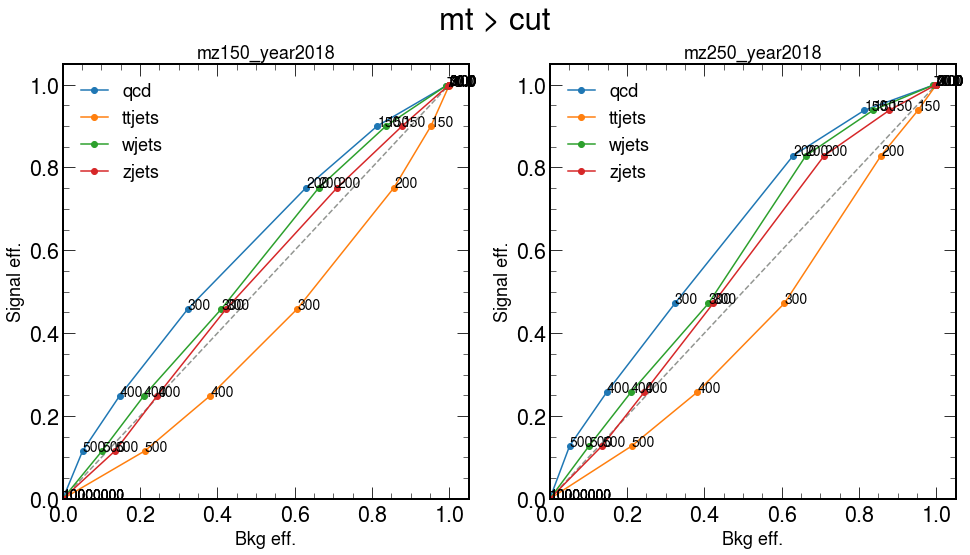

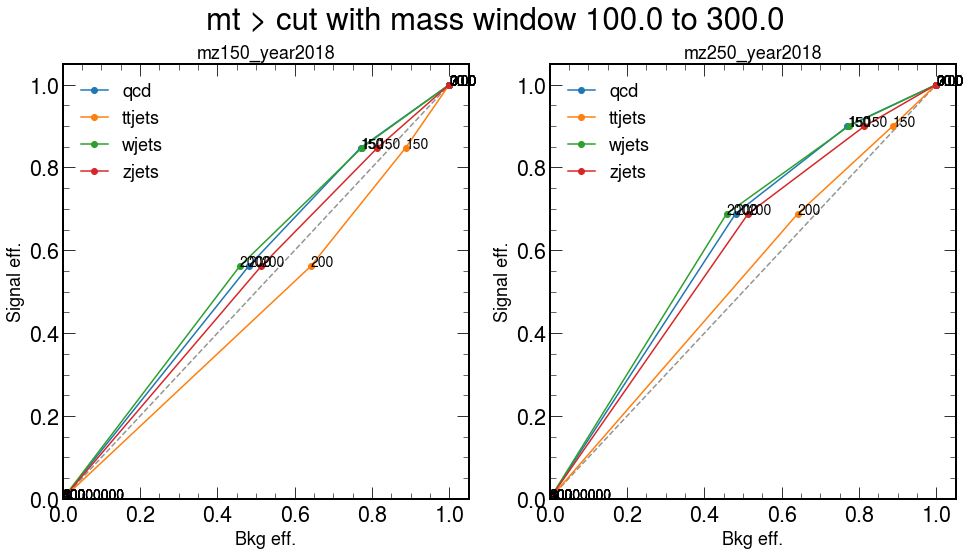

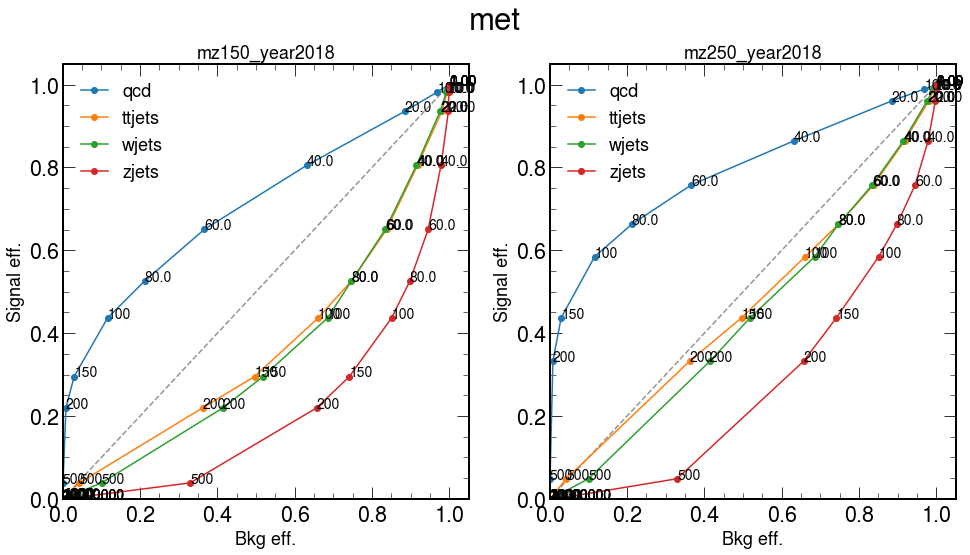

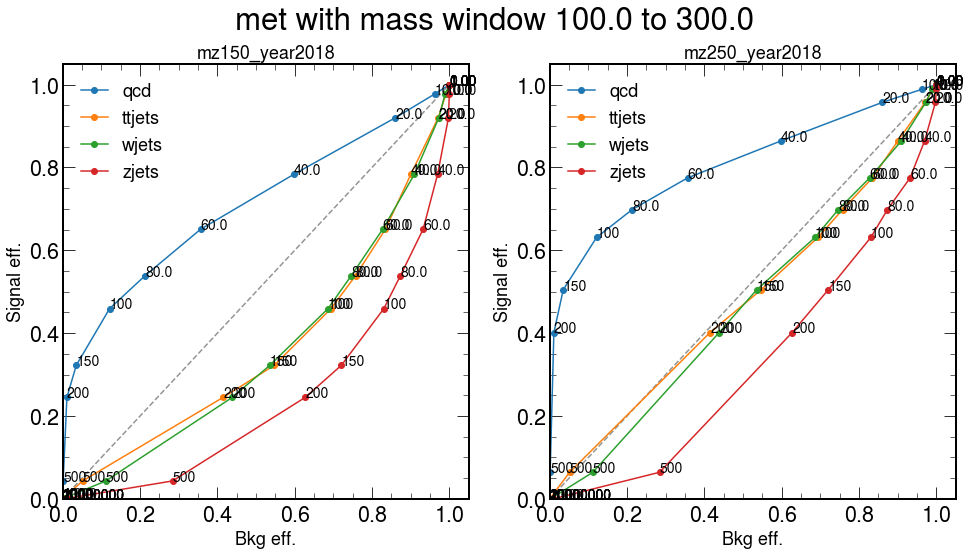

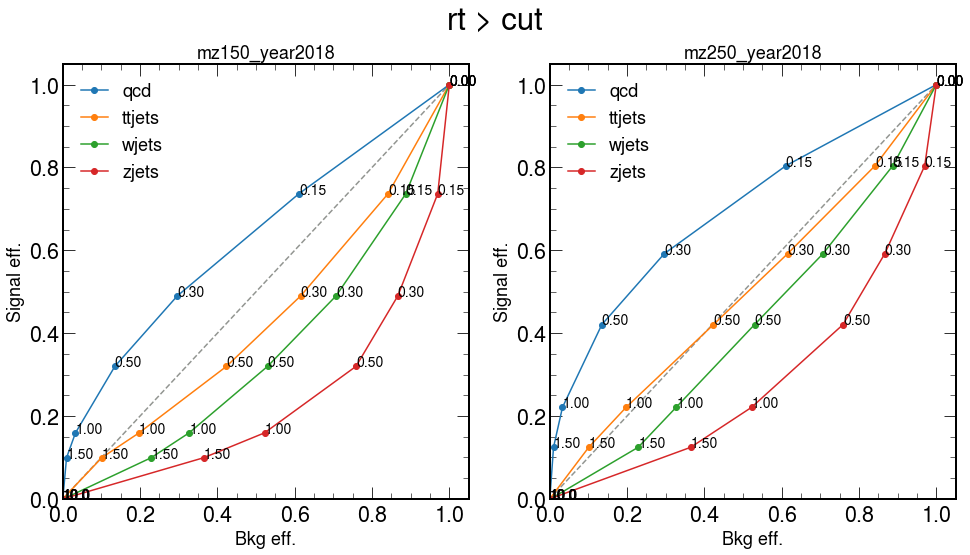

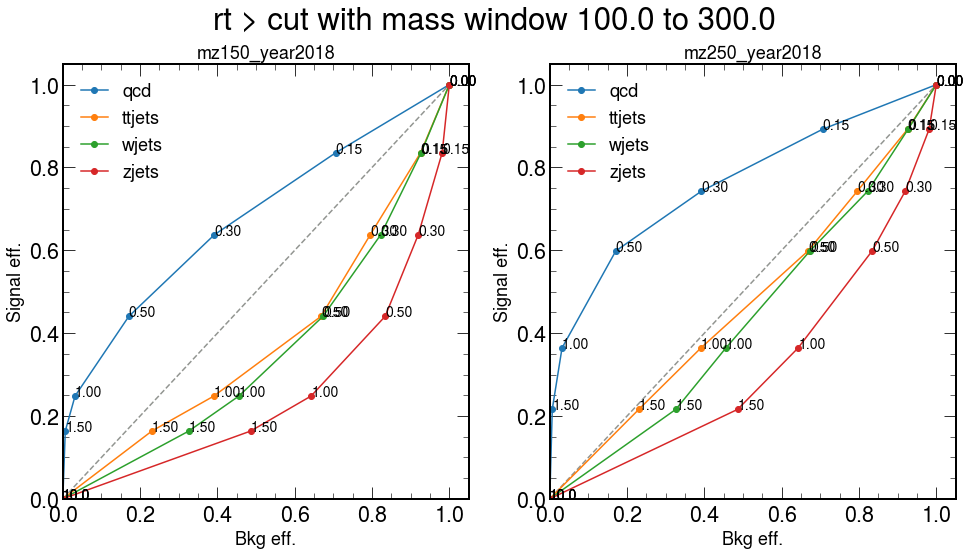

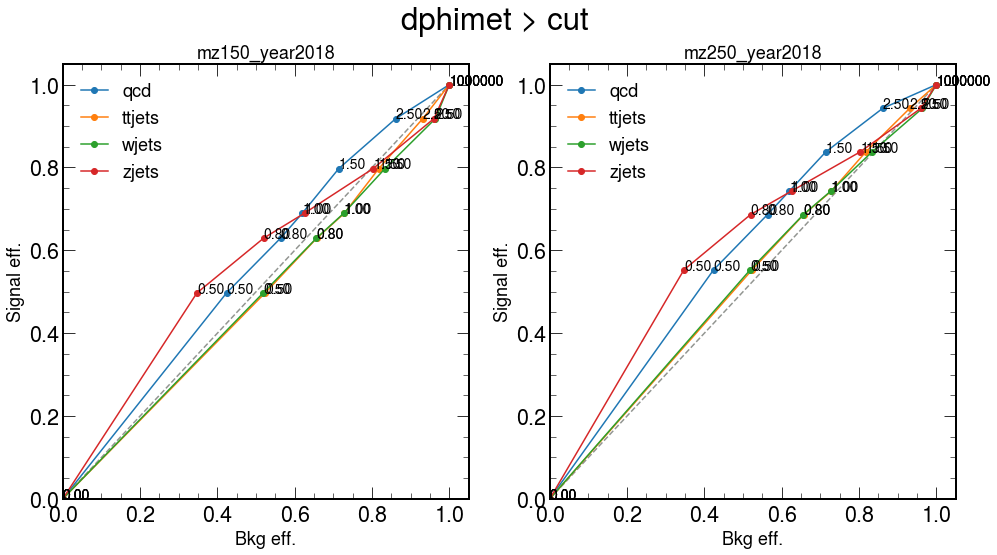

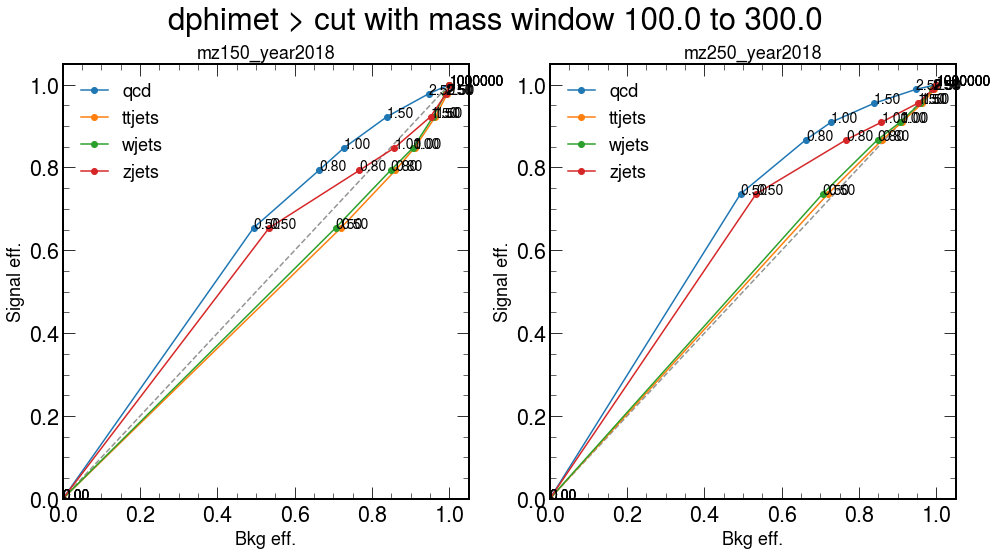

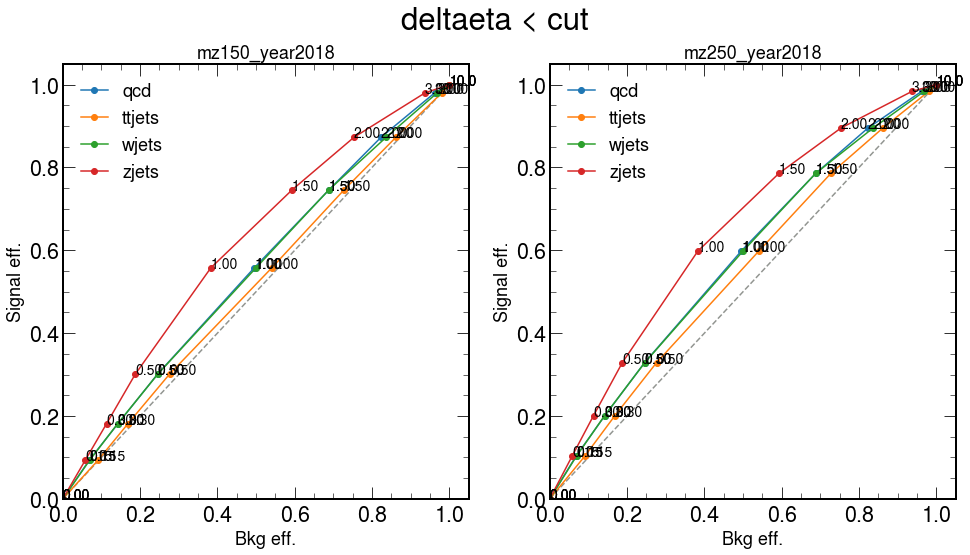

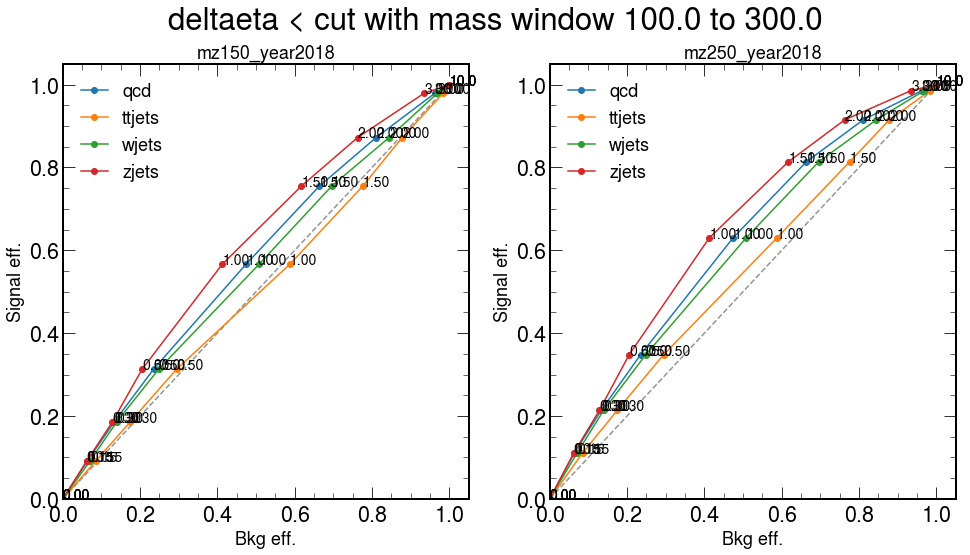

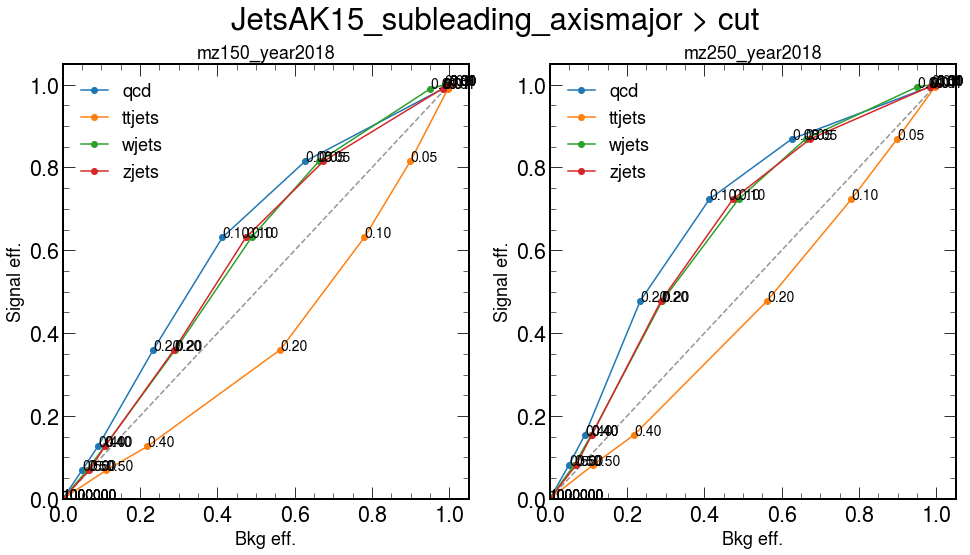

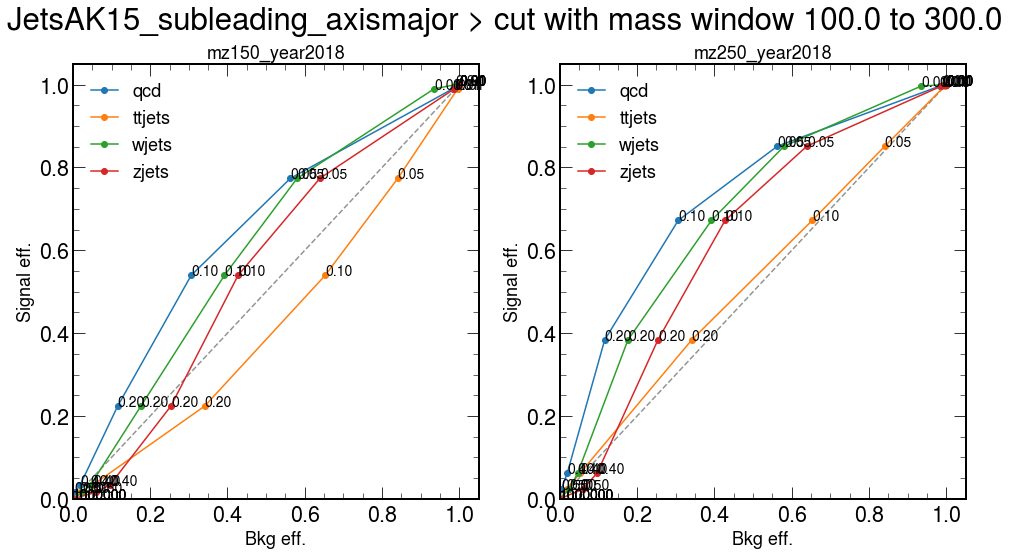

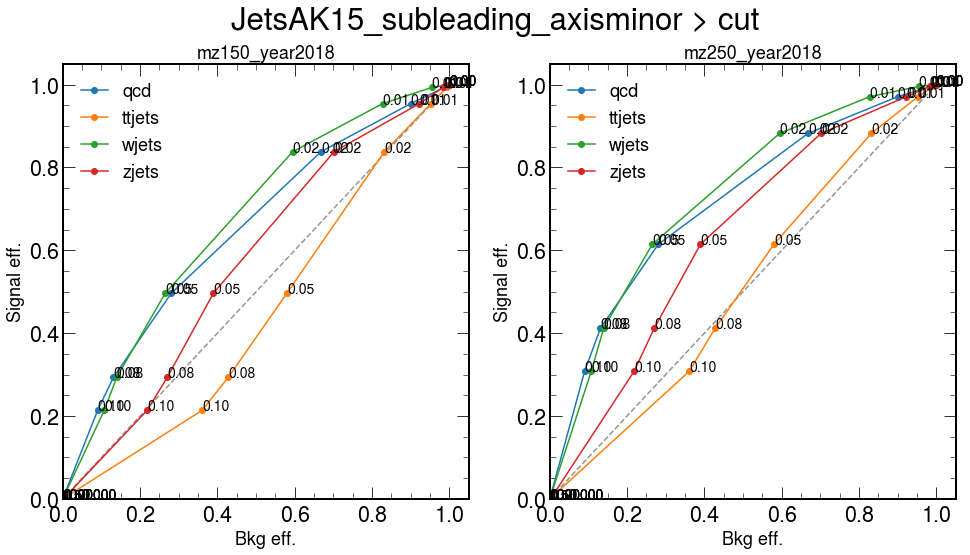

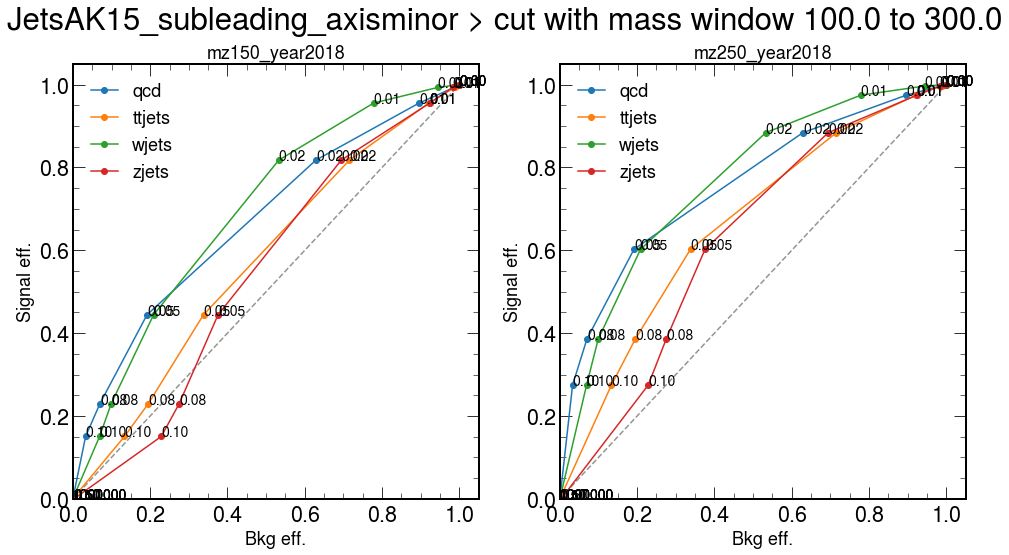

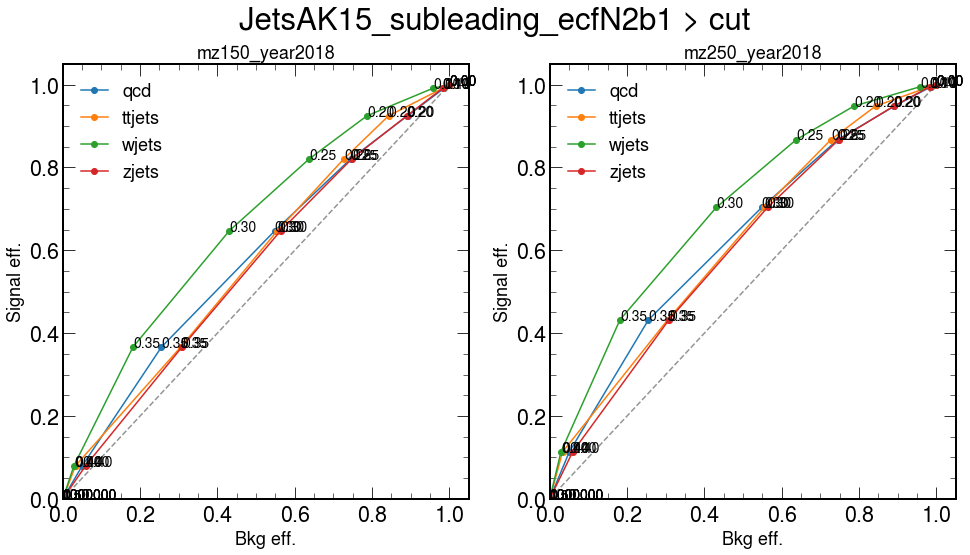

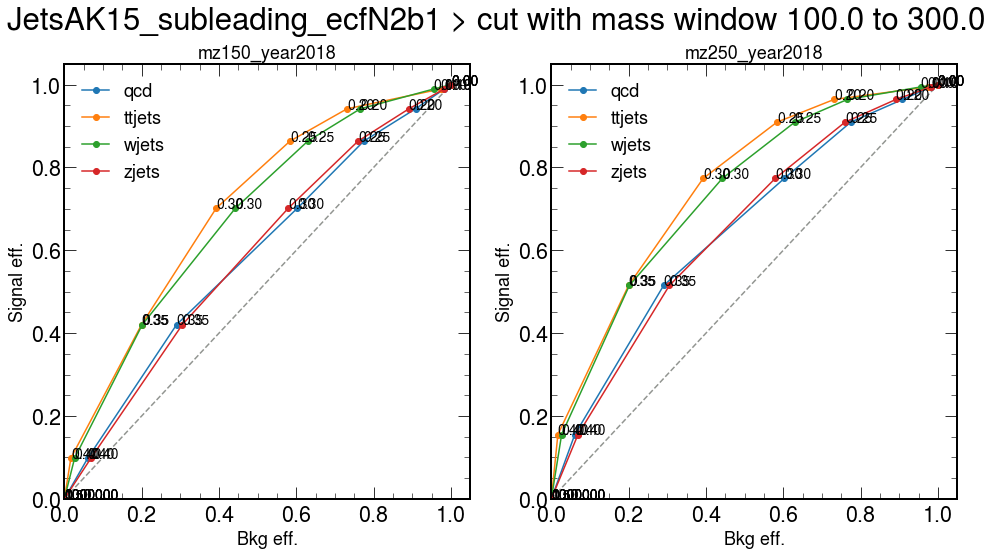

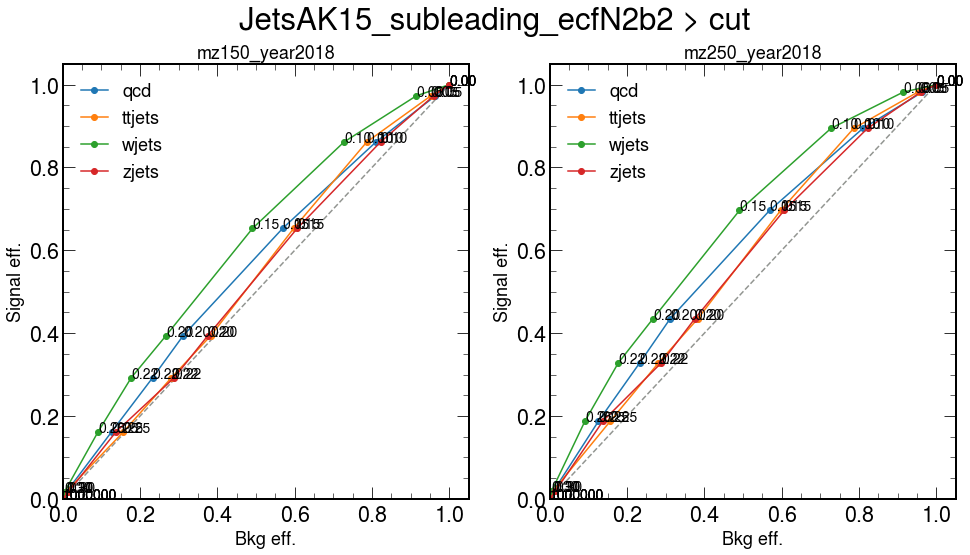

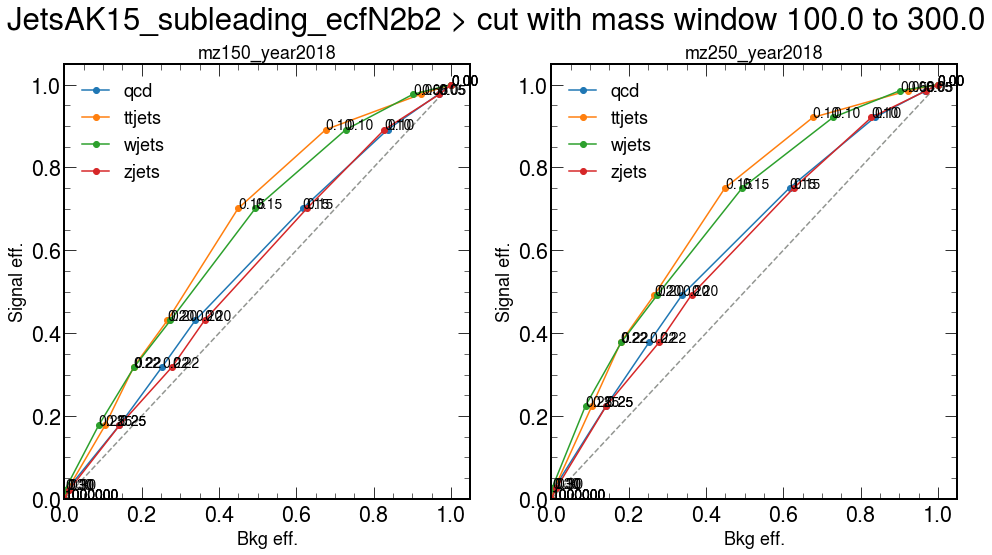

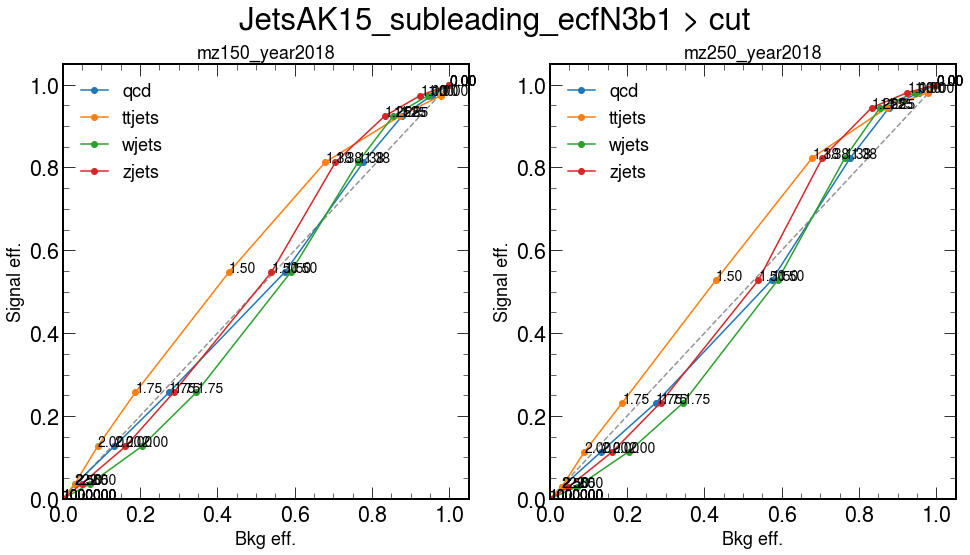

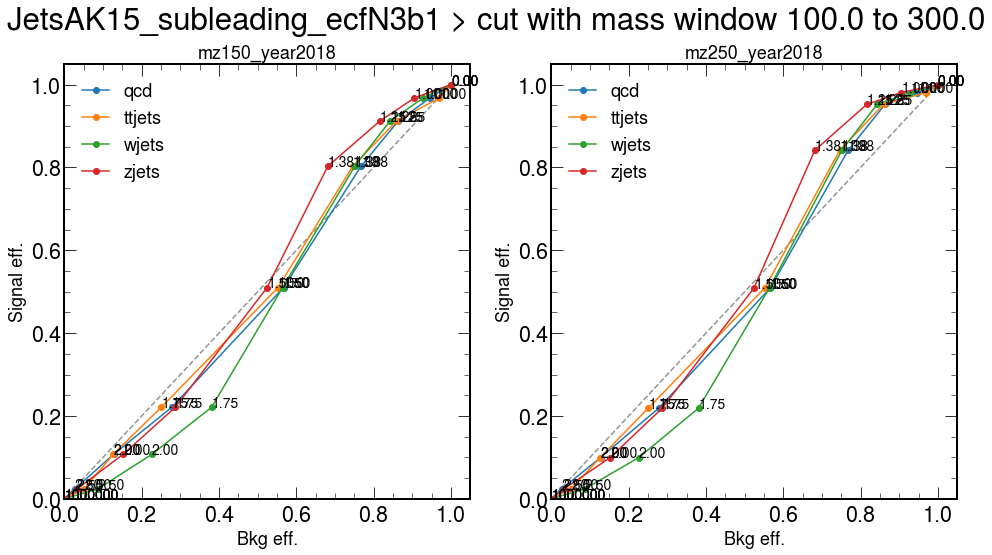

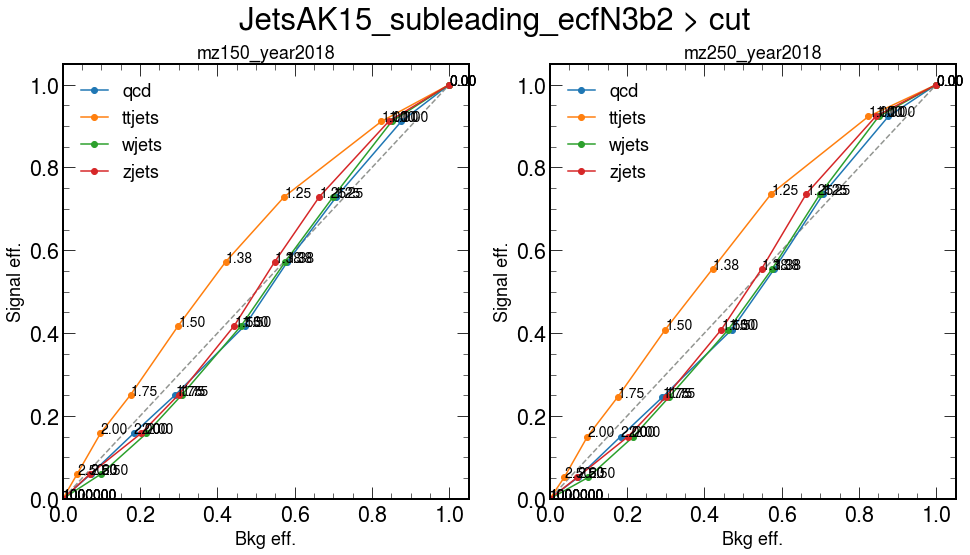

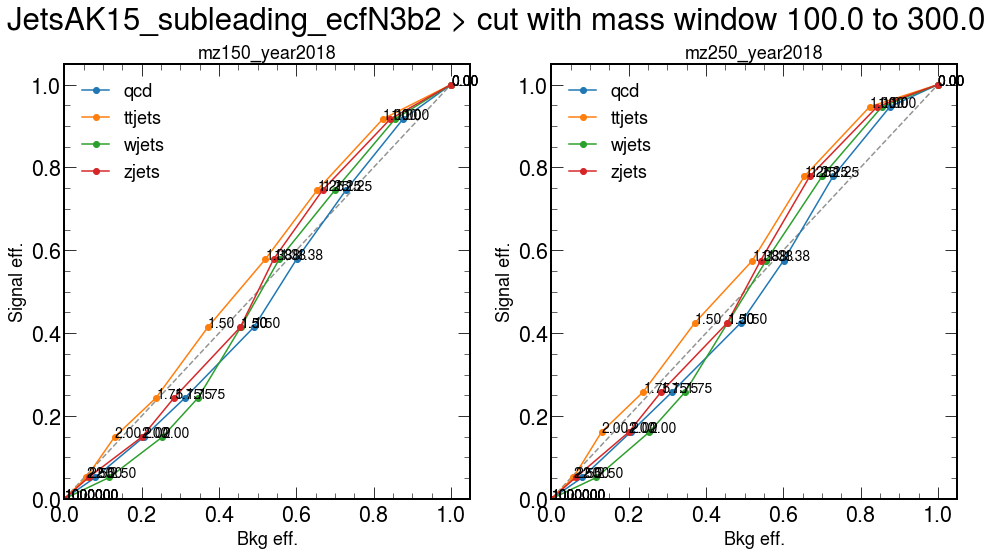

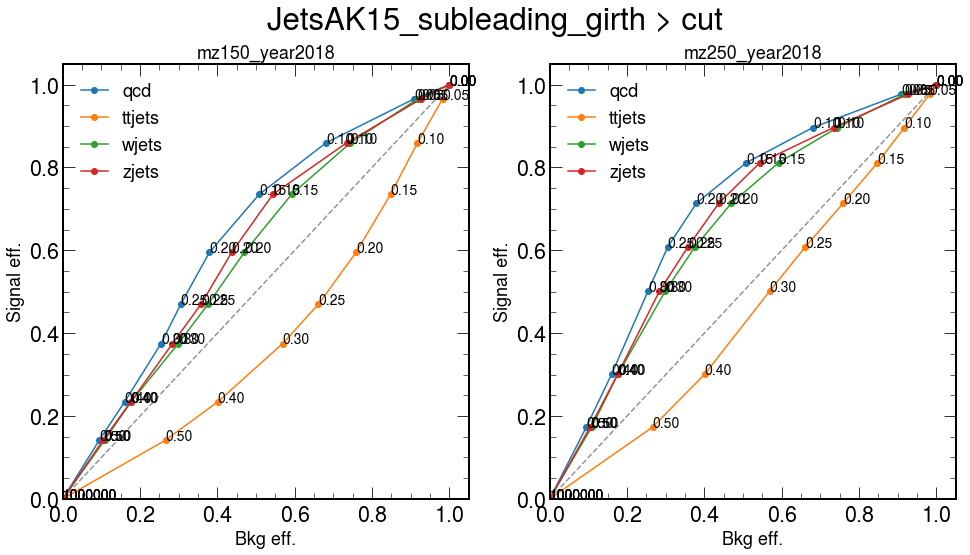

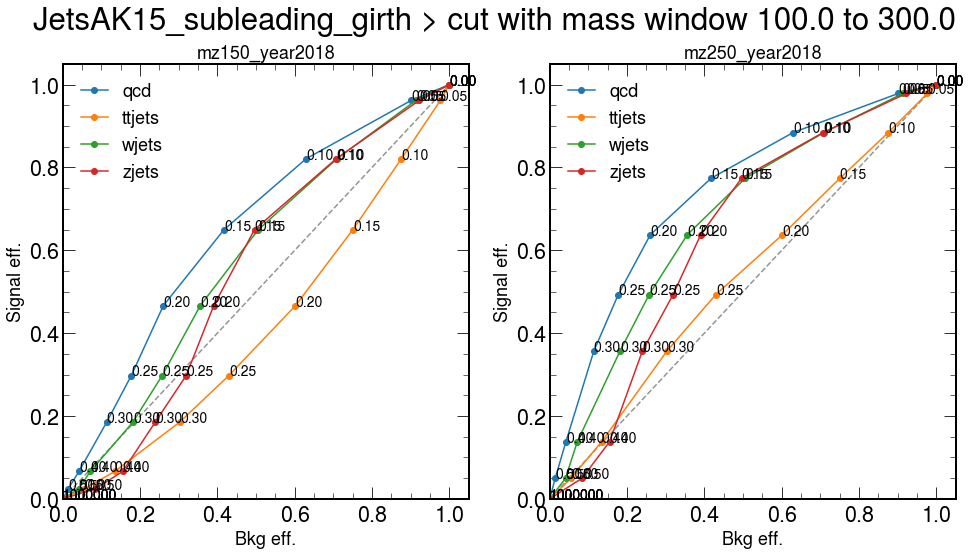

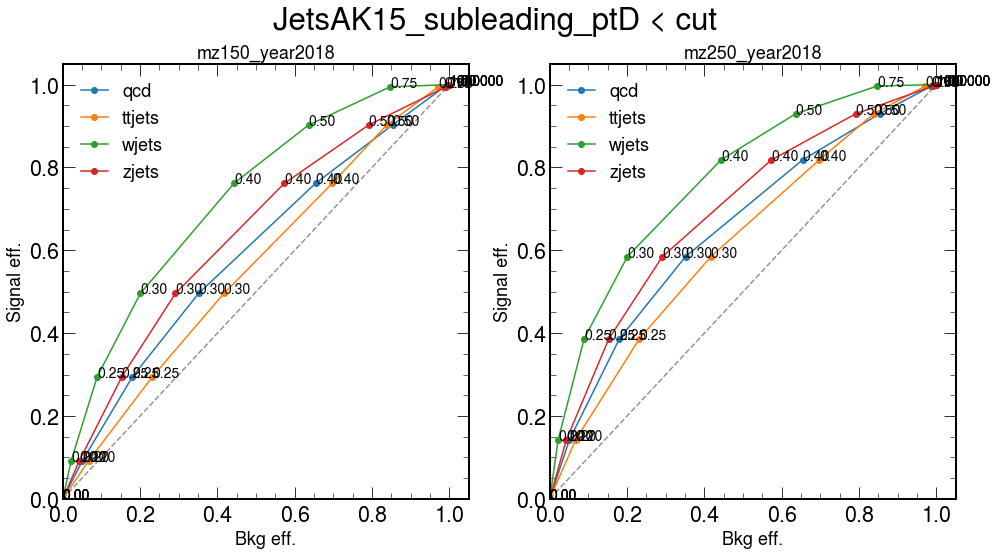

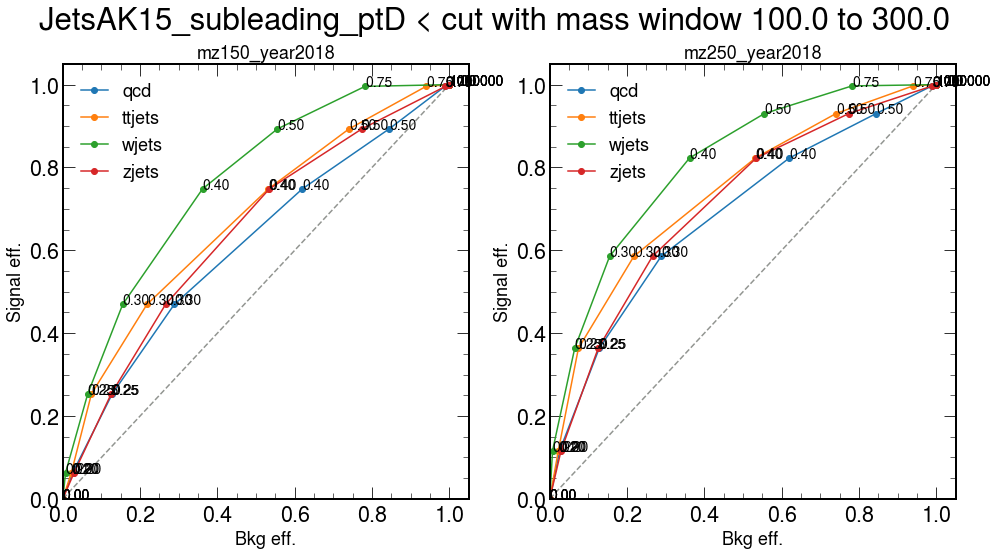

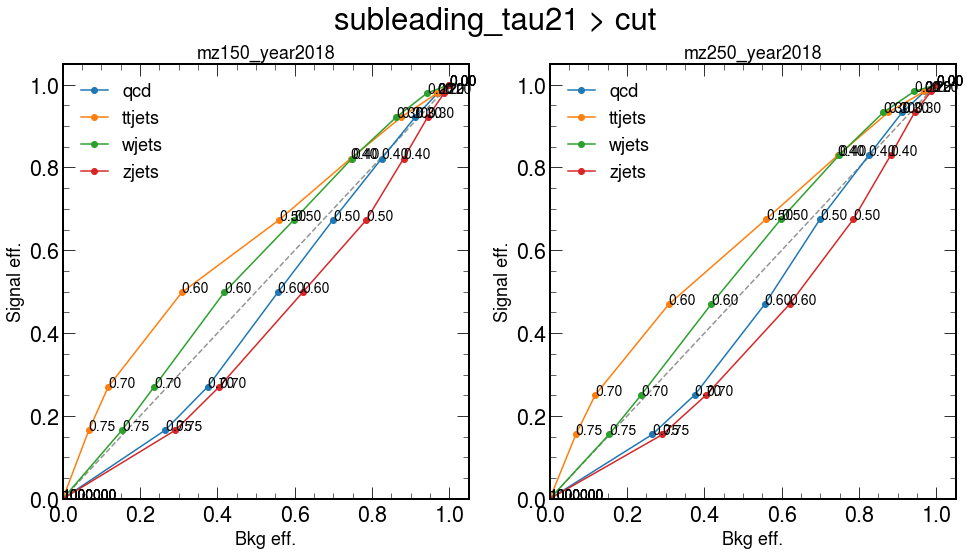

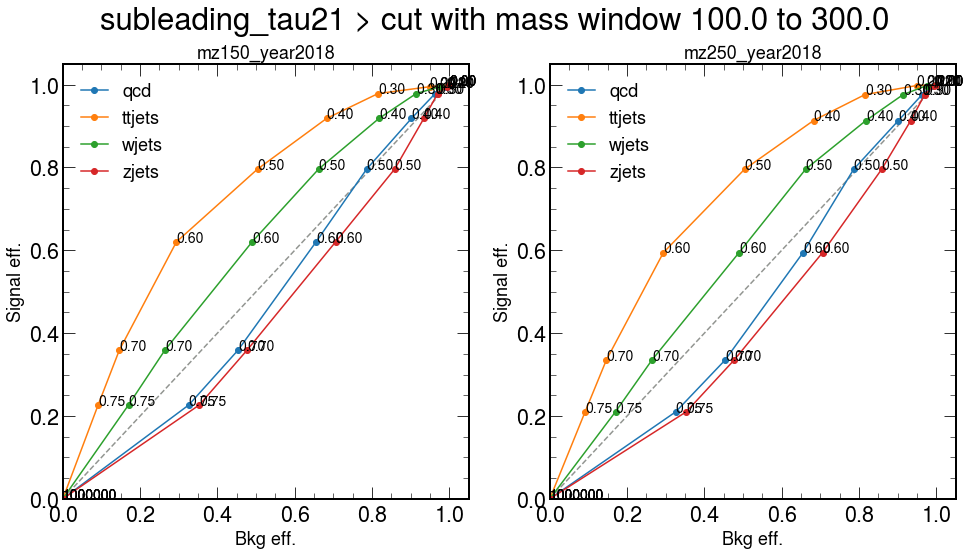

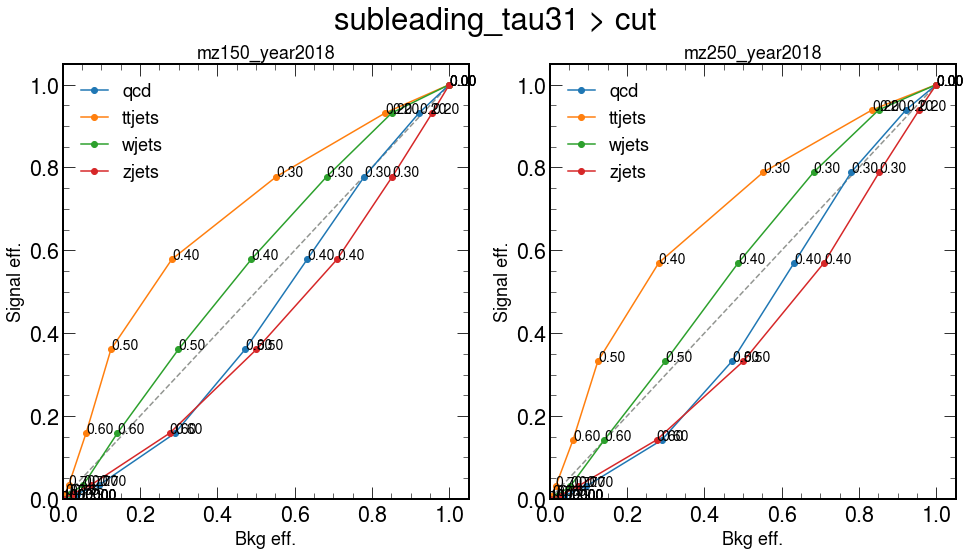

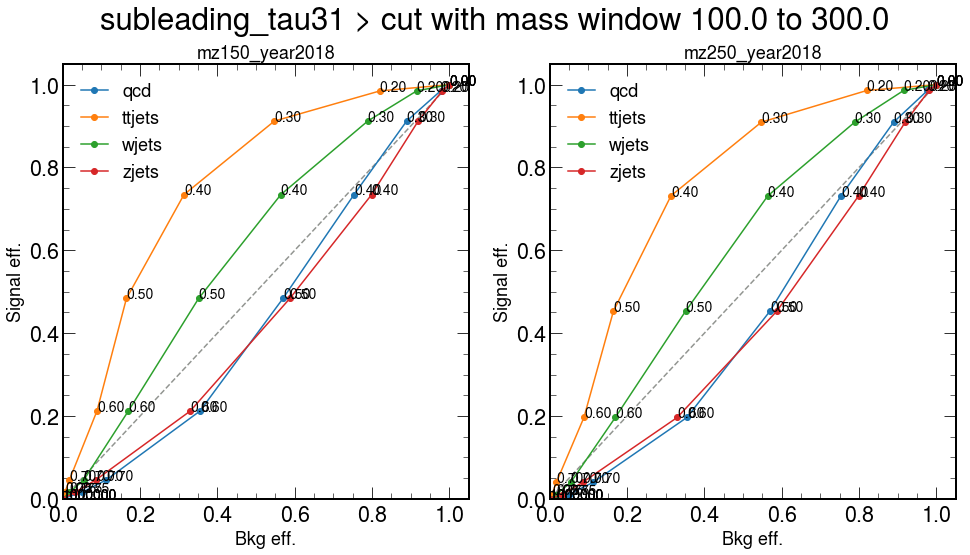

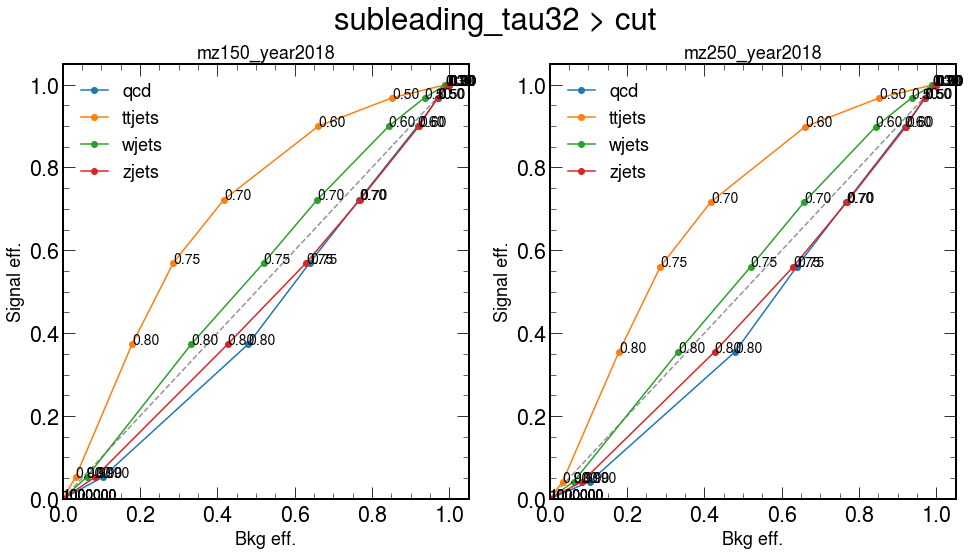

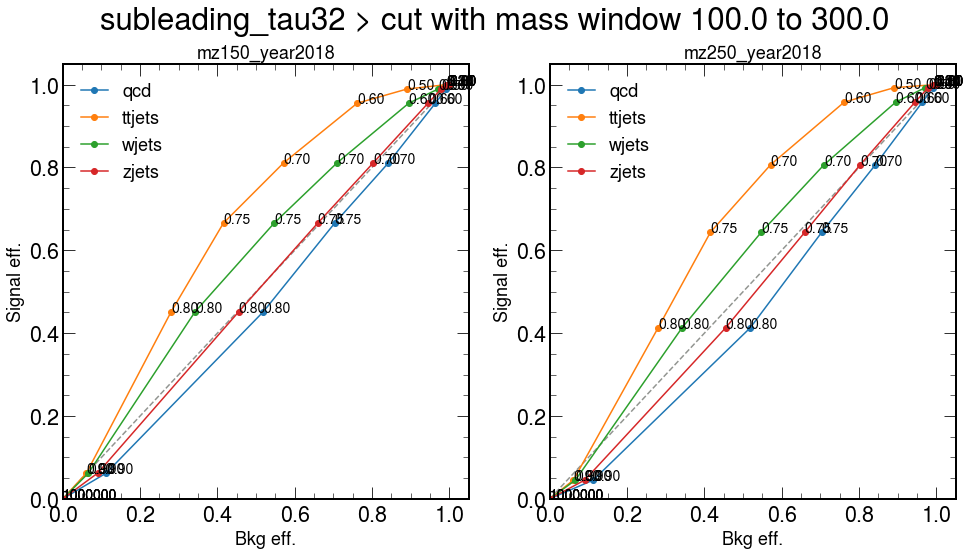

In [192]:
importlib.reload(svjflatanalysis)
importlib.reload(svjflatanalysis.arrayutils)
importlib.reload(svjflatanalysis.roccurve)

for cutfn, cutvals in [
    (
        svjflatanalysis.roccurve.mt_cut_function,
        [ 0.0, 30., 70., 150., 200., 300., 400., 500., 1e7 ]
        ),
    (
        svjflatanalysis.roccurve.met_cut_function,
        svjflatanalysis.roccurve.met_cut_values
        ),
    (
        svjflatanalysis.roccurve.rt_cut_function,
        svjflatanalysis.roccurve.rt_cut_values
        ),
    (
        svjflatanalysis.roccurve.dphimet_cut_function,
        svjflatanalysis.roccurve.dphimet_cut_values,
        ),
    (
        svjflatanalysis.roccurve.deltaeta_cut_function,
        svjflatanalysis.roccurve.deltaeta_cut_values,
        ),
    (
        svjflatanalysis.roccurve.subleading_axismajor_cut_function,
        [0.0, 0.005, 0.01, 0.05, 0.1, 0.2, 0.4, 0.5, 1e6]
        ),
    (
        svjflatanalysis.roccurve.subleading_axisminor_cut_function,
        [0.0, 0.005, 0.01, 0.02, 0.05, 0.08, 0.1, 0.5, 1e6]
        ),
    (
        svjflatanalysis.roccurve.subleading_ecfN2b1_cut_function,
        [0.0, 0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5, 1e6]
        ),
    (
        svjflatanalysis.roccurve.subleading_ecfN2b2_cut_function,
        [0.0, 0.05, 0.1, 0.15, 0.2, 0.22, 0.25, 0.3, 1e6]
        ),
    (
        svjflatanalysis.roccurve.subleading_ecfN3b1_cut_function,
        [0.0, 1.0, 1.25, 1.375, 1.5, 1.75, 2.0, 2.5, 1e6]
        ),
    (
        svjflatanalysis.roccurve.subleading_ecfN3b2_cut_function,
        [0.0, 1.0, 1.25, 1.375, 1.5, 1.75, 2.0, 2.5, 1e6]
        ),
    (
        svjflatanalysis.roccurve.subleading_girth_cut_function,
        [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 1e6]
        ),
    (
        svjflatanalysis.roccurve.subleading_ptD_cut_function,
        [0.0, 0.2, 0.25, 0.3, 0.4, 0.5, 0.75, 1.0, 1e6]
        ),
    (
        svjflatanalysis.roccurve.subleading_tau21_cut_function,
        [0.0, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 1e6]
        ),
    (
        svjflatanalysis.roccurve.subleading_tau31_cut_function,
        [0.0, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 1e6]
        ),
    (
        svjflatanalysis.roccurve.subleading_tau32_cut_function,
        [0.0, 0.3, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 1e6]
        ),
    ]:
    
    fig, _ = svjflatanalysis.roccurve.plot_multiple_signals_per_bkg(
        signals, bkgs,
        cutfn, cutvals
        )
    if hasattr(cutfn, 'name'):
        varname = cutfn.name
    else:
        varname = cutfn.__name__.replace('_cut_function', '')
    if hasattr(cutfn, 'operator'): varname += ' ' + cutfn.operator + ' cut'
    fig.suptitle(varname)
    plt.savefig('plots/'+make_plain_str(varname) + '.pdf', bbox_inches='tight')
    
    window_cutfn = svjflatanalysis.roccurve.apply_window_cutfn(cutfn, 100., 300.)

    fig, _ = svjflatanalysis.roccurve.plot_multiple_signals_per_bkg(
        signals, bkgs,
        window_cutfn, cutvals
        )
    title = varname + ' with mass window {} to {}'.format(window_cutfn.left, window_cutfn.right)
    fig.suptitle(title)
    plt.savefig('plots/'+make_plain_str(title)+'.pdf', bbox_inches='tight')
